# Project 4, APS1070 Winter 2024
#### **Linear Regression -  14 points**
**Deadline: Mar 28th, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Parsa Youssefpour    
*   Your **student number**: 1004749659

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.


Ref: https://stackoverflow.com/a/64487858

## Part 1 - Getting Started [2 marks]

In this project, we are going to design a mathematical model that predicts the control actions on the ailerons of an aircraft.

For this purpose, we are going to use the [ailerons](https://www.dcc.fc.up.pt/~ltorgo/Regression/ailerons.html) dataset containing 13,750 instances and 40 continuous features describing the status of a F16 aircraft. The goal is to predict the `goal` column, which is the control actions on the ailerons.

In [1]:
import pandas as pd
df = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/Ailerons.csv',
    index_col=None
)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[1.5]**
*   Using `train_test_split` from Sklearn, split the dataset into training and validation sets ($80\%$ training, $20\%$ validation). When splitting, set `random_state=1`. **[0.5]**
*   Standardize the data **manually** according to the same method as `StandardScaler` from sklearn, but you may not directly use `StandardScaler'. **[0.5]**
*   Insert a first column of all $1$s in both the training and validation data sets.**[0.5]**
3. Explain why we should not insert the column of $1$s prior to standardization. **[0.5]**

In [27]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
import numpy as np

display(df)
feature_col = list(df.columns)
feature_col.remove("goal")
target = df['goal']
features = df[feature_col]
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=1)

std_dict_train = {}
std_dict_test = {}
for feature in feature_col:
    mean = np.mean(X_train[feature])
    std = np.std(X_train[feature])

    x_train = np.asarray(X_train[feature])
    z_train = (x_train - mean)/std
    std_dict_train[feature] = z_train

    x_test = np.asarray(X_val[feature])
    z_test = (x_test - mean)/std
    std_dict_test[feature] = z_test

std_X_train = pd.DataFrame(std_dict_train)
std_X_val = pd.DataFrame(std_dict_test)

std_X_train['Bias'] = np.ones((std_X_train.shape[0],1))
std_X_val['Bias'] = np.ones((std_X_val.shape[0],1))



,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se,goal
0,2,-56,-0.33,-0.09,0.90,0.2,-11,12,0.004,-0.1,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.032,-0.0009
1,470,-39,0.02,0.12,0.39,-0.6,-12,8,0.009,-1.6,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.034,-0.0011
2,165,4,0.14,0.14,0.78,0.4,-11,-9,-0.003,-0.2,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1.0,0.034,-0.0012
3,-113,5,-0.12,0.11,1.06,0.6,-10,-7,-0.008,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.033,-0.0011
4,-411,-21,-0.17,0.07,1.33,-0.6,-11,0,0.002,0.1,...,0.0,0.0,0.0,0.0,0.0,-0.002,0.0,0.9,0.032,-0.0008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,399,-22,0.17,0.20,0.36,-0.2,-9,-3,0.010,-3.9,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.8,0.027,-0.0008
13746,237,-6,0.26,0.10,0.52,0.7,-8,-8,-0.004,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.8,0.027,-0.0010
13747,-148,-3,-0.37,0.09,0.89,0.7,-8,-7,-0.013,-0.2,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.7,0.026,-0.0006
13748,-237,-11,-0.47,-0.16,0.90,-0.4,-9,8,0.010,2.8,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.7,0.023,-0.0005


Q: Explain why we should not insert the column of 1s prior to standardization

A: The column of 1s is used for models that do not naturally pass throught the origin. Inserting this column prior to standardization is not done as we don't want this column to change and get distorted.

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the inversion, as numpy.linalg.inv may cause an error.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [33]:
### YOUR CODE HERE ###
import scipy
from sklearn.metrics import mean_squared_error


W = np.dot(scipy.linalg.inv(np.dot(std_X_train.T, std_X_train)), np.dot(std_X_train.T, y_train))
print(W.shape)

y_pred_train = np.dot(std_X_train, W)
y_pred_valid = np.dot(std_X_val, W)

RMSE_train = np.square(mean_squared_error(y_pred_train, y_train))
RMSE_valid = np.square(mean_squared_error(y_pred_valid, y_val))

print("Training RMSE:", RMSE_train)
print("Validation RMSE:", RMSE_valid)





(41,)
Training RMSE: 2.9969613122946373e-15
Validation RMSE: 2.6235562152696455e-15


## Part 3 - Full Batch Gradient Descent [4 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data.

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges.

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part.

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).
  Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[1]**

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[1]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

* Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]**

In [32]:
def RMSE(pred, label):
    return np.square(mean_squared_error(pred, label))

--- Total Training Time: 2.083143949508667 (s) ---


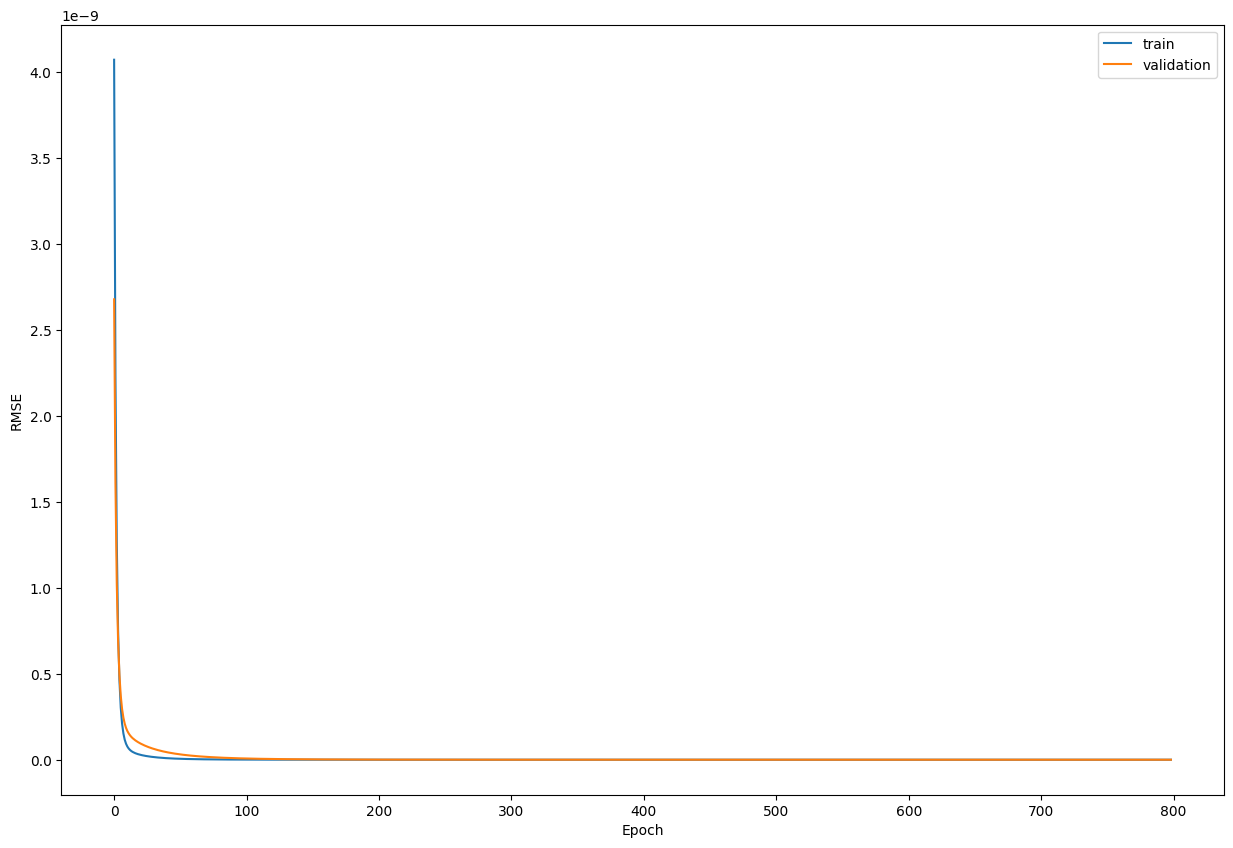

In [185]:
import matplotlib.pyplot as plt
import time
start_time = time.time() ## Records current time
np.random.seed(2)

alpha  = 0.01
w = (np.random.random(std_X_train.shape[1])/1000)
rmse_train = []
rmse_val = []
CT = RMSE_valid * 1.001

RMSE_GD = float('inf')

while RMSE_GD > CT:
    y = np.dot(std_X_train,w.T)
    rmse_train.append(RMSE(y , y_train))
    gradient = (1/len(y) * np.dot(std_X_train.T, y-y_train))
    w = w - alpha * gradient

    y_pred = np.dot(std_X_val,w.T)
    RMSE_GD = RMSE(y_pred,y_val)
    rmse_val.append(RMSE_GD)

plt.figure(figsize=(15,10))
plt.plot(rmse_train, label = "train")
plt.plot(rmse_val, label = "validation")
plt.ylabel("RMSE")
plt.xlabel("Epoch")

plt.legend()
plt.show


## GD Script -- Sample code in tutorial! ##

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

Comment on overfitting/underfitting by observing the training and validation RMSE

Both training and validation curve generally follow the same trend, and reach a very low RMSE which is a good sign. However, the begining of the curve it can be seen that the training curve drops faster than the validation curve which could indicate that the model that point is slightly overfitted.

---

Q: Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)?

A: Epoch is training on the entire dataset, while an interation is updating the weights on each batch.

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are:
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays:
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes:
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged.
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`.

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [165]:
### YOUR CODE HERE ###
def mini_batch_SGD(train_feature, val_feature, train_label, val_label, batch_size, CT, lr = 0.01):
    train_RMSE = []
    val_RSME = []
    epoch_time = []
    
    RMSE_val = float('inf')
    cum_train_time = 0

    W = (np.random.random(train_feature.shape[1])/1000)
    rows = train_feature.shape[0]

    larger_error = 0

    while RMSE_val > CT:
        start_time = time.time()

        indices = list(np.random.permutation(rows))
        X_shuffeld = train_feature.iloc[indices]
        Y_shuffeld = train_label.iloc[indices]

        for i in range(0, rows, batch_size):
            X_i = X_shuffeld.iloc[i:i+batch_size]
            Y_i = Y_shuffeld.iloc[i:i+batch_size]
            y = np.dot(X_i,W.T)
            gradient = (1/len(y) * np.dot(X_i.T, y-Y_i))
            W = W - alpha * gradient

        cum_train_time += time.time()-start_time
        epoch_time.append(cum_train_time)
        
        y_pred_train = np.dot(train_feature,W.T)
        RMSE_train = RMSE(y_pred_train,train_label)
        train_RMSE.append(RMSE_train) 
        
        y_pred_val = np.dot(val_feature,W.T)
        RMSE_val = RMSE(y_pred_val,val_label)   
        val_RSME.append(RMSE_val)

        #check if the rmse error is getting bigger to stop training
        if len(val_RSME) > 1 and (RMSE_val*0.75 > val_RSME[-2] ):
            larger_error += 1
            if larger_error > 3:
                print(f"batch {batch_size} & learning rate {lr} does not converge")
                return W, train_RMSE, val_RSME, epoch_time
        else:
            larger_error = 0

    # print(f"batch {batch_size} & learning rate {lr} converges!!!")
    return W, train_RMSE, val_RSME, epoch_time

In [167]:
CT = RMSE_valid * 1.001

batch_sizes = [2**i for i in range(1,12)]

for batch_size in batch_sizes:
    result = mini_batch_SGD(std_X_train, std_X_val,y_train,y_val, batch_size, CT, lr = 0.01)



batch 2 & learning rate 0.01 does not converge
batch 4 & learning rate 0.01 does not converge
batch 8 & learning rate 0.01 does not converge
batch 16 & learning rate 0.01 does not converge
batch 32 & learning rate 0.01 does not converge
batch 64 & learning rate 0.01 does not converge


NOTE: ALL OF THE RSME GRAPHS HAVE LOG SCALED Y AXIS FOR BETTER VISUALIZATION

<function matplotlib.pyplot.show(close=None, block=None)>

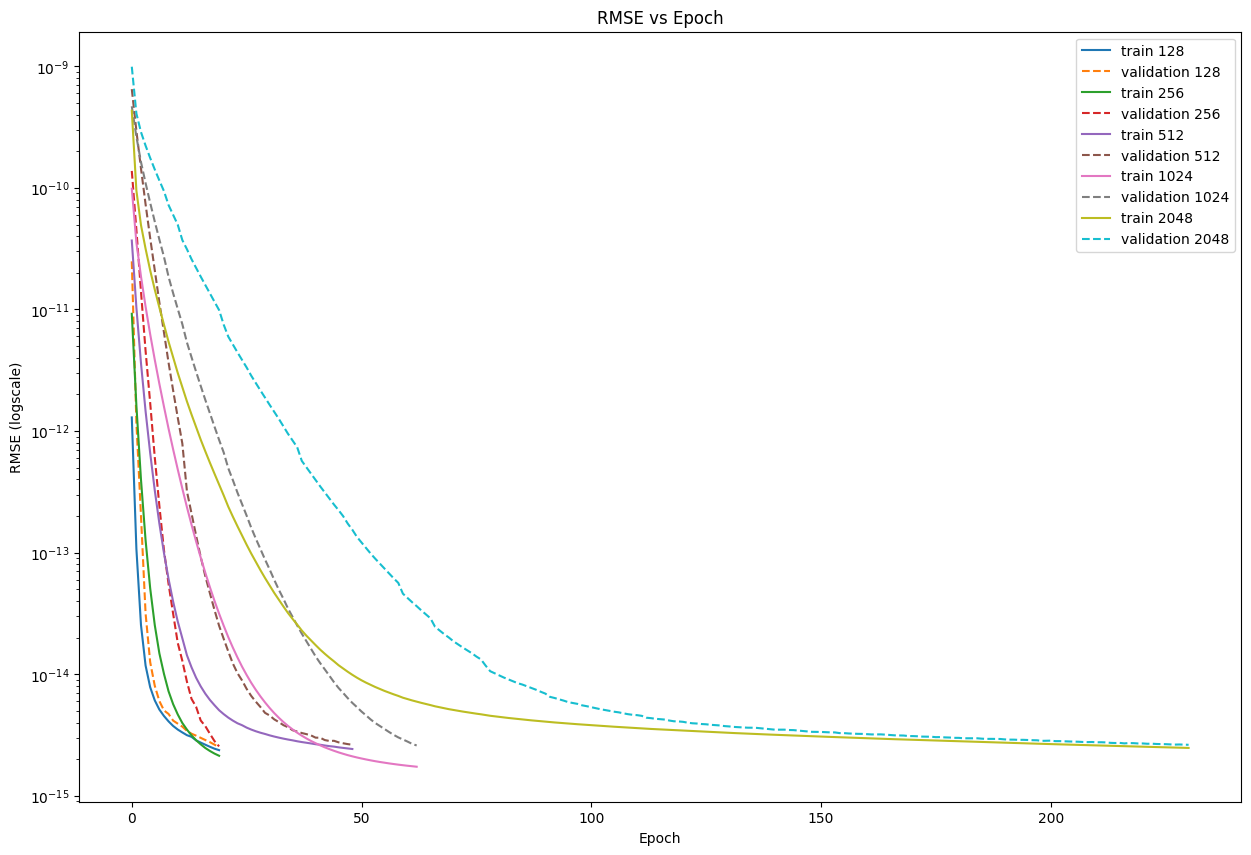

In [149]:
converging_batch_sizes = [128,256,512,1024,2048]

plt.figure(figsize=(15,10))

for batch_size in converging_batch_sizes:
    Weight, train_RMSE, val_RSME, epoch_time = mini_batch_SGD(std_X_train, std_X_val,y_train,y_val, batch_size, CT, lr = 0.01)
    
    
    plt.plot(train_RMSE, label = f"train {batch_size}")
    plt.plot(val_RSME, label = f"validation {batch_size}", linestyle = 'dashed')

plt.title('RMSE vs Epoch')
plt.ylabel("RMSE (logscale)")
plt.xlabel("Epoch")
plt.yscale('log')
plt.legend()
plt.show

    

TAKE AWAY

This graph shows a general tred that as the number of batches increases the, number of epochs needed to reach convergence also increases. It can also be noticed that as the batch sizes increase the model tends to overfit more to the training data.

<function matplotlib.pyplot.show(close=None, block=None)>

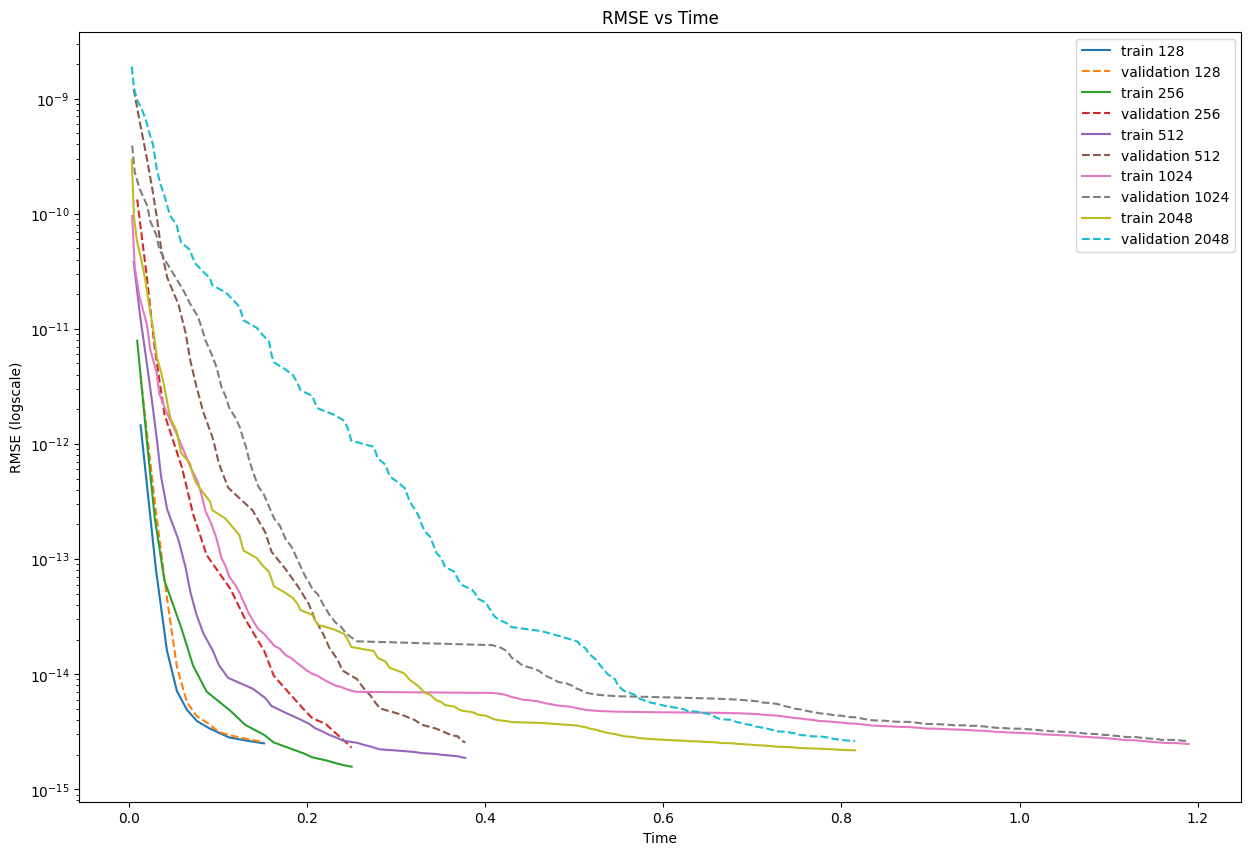

In [150]:
converging_batch_sizes = [128,256,512,1024,2048]

plt.figure(figsize=(15,10))

for batch_size in converging_batch_sizes:
    Weight, train_RMSE, val_RSME, epoch_time = mini_batch_SGD(std_X_train, std_X_val,y_train,y_val, batch_size, CT, lr = 0.01)
    
    plt.plot(epoch_time, train_RMSE, label = f"train {batch_size}")
    plt.plot(epoch_time, val_RSME, label = f"validation {batch_size}", linestyle = 'dashed')

plt.title('RMSE vs Time')
plt.ylabel("RMSE (logscale)")
plt.xlabel("Time")
plt.yscale('log')
plt.legend()
plt.show

TAKE AWAY

This graph similar to the one before shows an increase in batch size generally increases training time. However, there is an exeption as batch 1024 seems to take longer than batch 2048. The over fitting of model as the batch size increase can also be seen in this graph. Finally, the curve in this graph are not as smooth as the previouse one.

<function matplotlib.pyplot.show(close=None, block=None)>

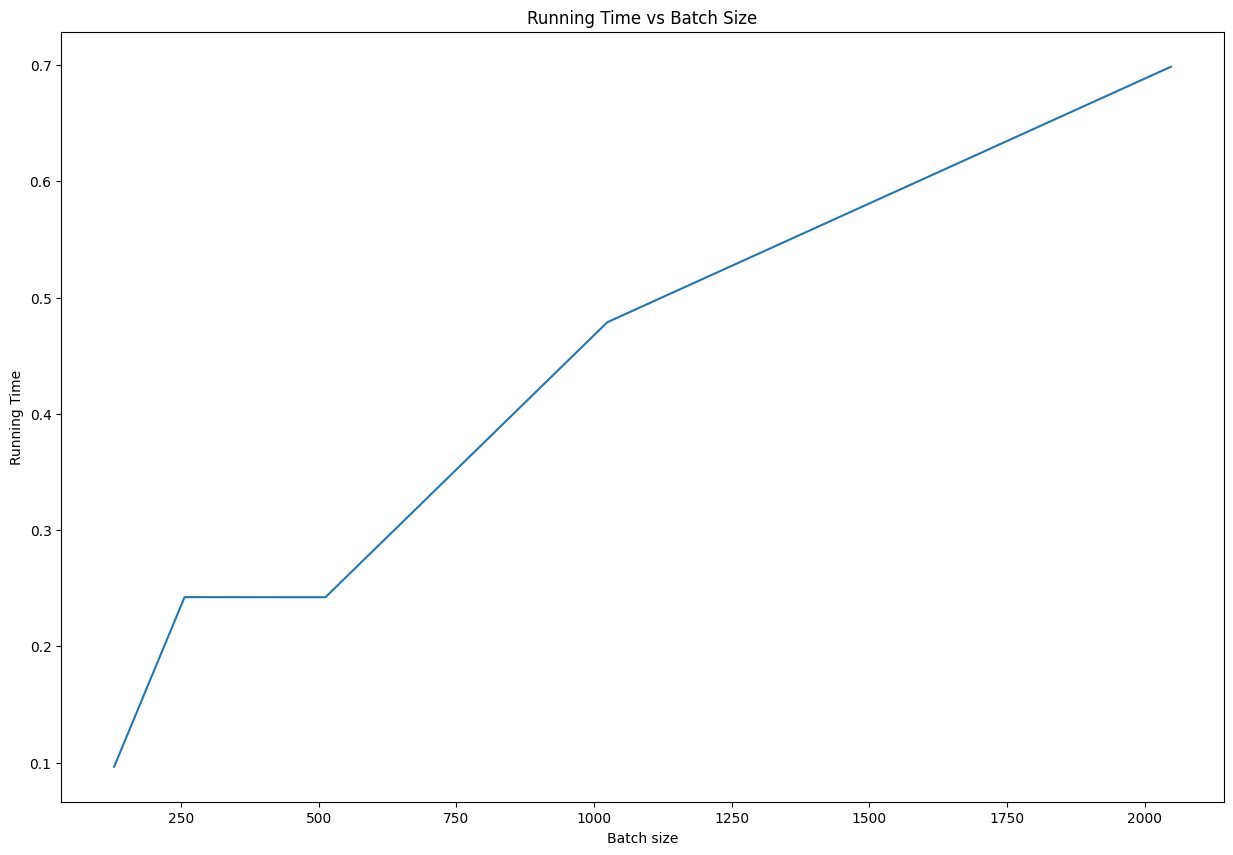

In [183]:
converging_batch_sizes = [128,256,512,1024,2048]

total_time = []
for batch_size in converging_batch_sizes:
    Weight, train_RMSE, val_RSME, epoch_time = mini_batch_SGD(std_X_train, std_X_val,y_train,y_val, batch_size, CT, lr = 0.01)
    
    total_time.append(epoch_time[-1])

plt.figure(figsize=(15,10))
plt.plot(converging_batch_sizes,total_time)
plt.title('Running Time vs Batch Size')
plt.ylabel("Running Time")
plt.xlabel("Batch size")
plt.show

Take Away

The general trend that can be seen in this graph is that as the batch size increases the training time also increases. Therefore, in this case the best model (the model that converges the fastest) is the model with 128 batches.

## Part 5 - Gradient Descent Learning Rate [3 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batch sizes that do not converge with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[1]**

2. Select the best batch size based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD.
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[1]**

In [169]:
### YOUR CODE HERE ###

batch_size_diverge = [16,32,64]
learning_rates =np.arange(0.001, 0.0000, -0.0002)

# learning_rates = [0.99,0.75,0.5,0.1,0.05,0.001,0.005, 0.0001, 0.0005, 0.00001, 0.00005]
for lr in learning_rates:
    lr = round(lr,5)
    print("\n")
    print(f'################# Learning Rate: {lr} #################')
    for batch_size in batch_size_diverge:
        Weight, train_RMSE, val_RMSE, epoch_time = mini_batch_SGD(std_X_train, std_X_val,y_train,y_val, batch_size, CT, lr)
        print(f'Batch Size: {batch_size} | Training RSME: {train_RMSE[-1]} | Validation RSME: {val_RMSE[-1]}')

        



################# Learning Rate: 0.001 #################
batch 16 & learning rate 0.001 does not converge
Batch Size: 16 | Training RSME: 23689746378.448086 | Validation RSME: 23543191912.374832
batch 32 & learning rate 0.001 does not converge
Batch Size: 32 | Training RSME: 0.788774124463915 | Validation RSME: 9.851435397111105
batch 64 & learning rate 0.001 does not converge
Batch Size: 64 | Training RSME: 519021574359886.06 | Validation RSME: 1286790401123660.2


################# Learning Rate: 0.0008 #################
batch 16 & learning rate 0.0008 does not converge
Batch Size: 16 | Training RSME: 134380299.28563043 | Validation RSME: 97947696220.69775
batch 32 & learning rate 0.0008 does not converge
Batch Size: 32 | Training RSME: 0.5616460617163166 | Validation RSME: 0.1587518430357554
batch 64 & learning rate 0.0008 does not converge
Batch Size: 64 | Training RSME: 0.9470163506204596 | Validation RSME: 16.08060414905996


################# Learning Rate: 0.0006 ############

Take away

Unfortuatley, I couldn't find a learning rate the converged any of the batch sizes. This might be caused by the method that I design to catch divergence.

<function matplotlib.pyplot.show(close=None, block=None)>

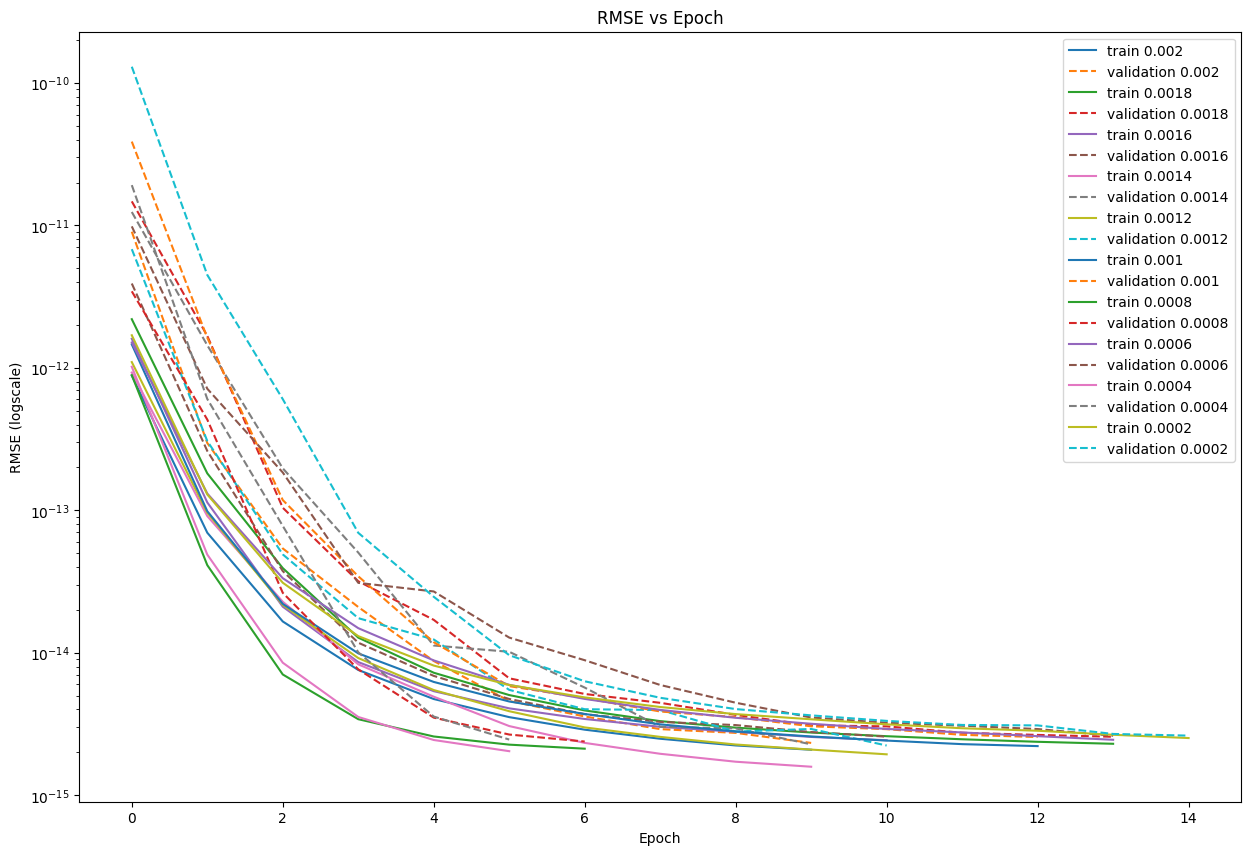

In [177]:
learning_rates_2 =np.arange(0.002, 0.0000, -0.0002)

plt.figure(figsize=(15,10))
for lr in learning_rates_2:
    lr = round(lr,5)
    Weight, train_RMSE, val_RMSE, epoch_time = mini_batch_SGD(std_X_train, std_X_val,y_train,y_val, batch_size=128, CT=CT, lr=lr)

    plt.plot(train_RMSE, label = f"train {lr}")
    plt.plot(val_RMSE, label = f"validation {lr}", linestyle = 'dashed')

plt.title('RMSE vs Epoch')
plt.ylabel("RMSE (logscale)")
plt.xlabel("Epoch")
plt.yscale('log')
plt.legend()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

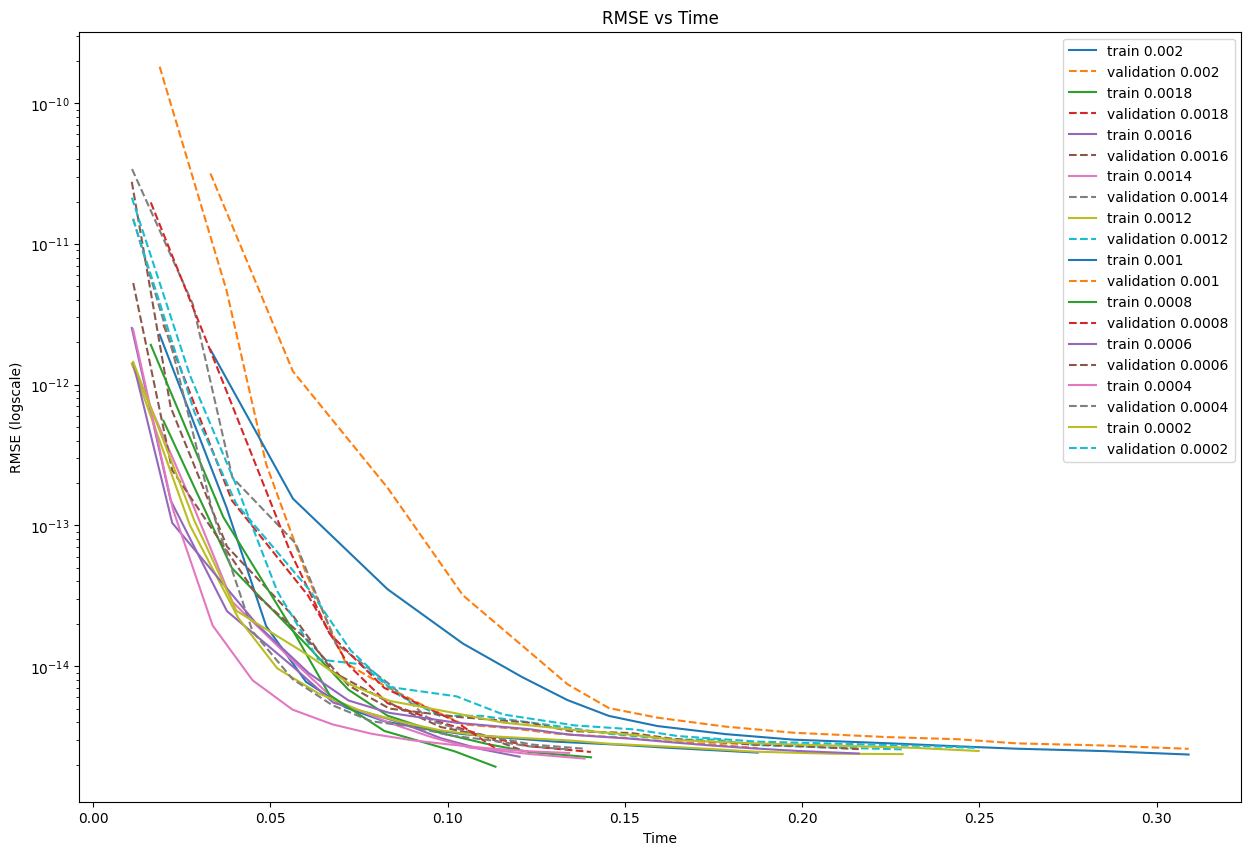

In [179]:
plt.figure(figsize=(15,10))

for lr in learning_rates_2:
    lr = round(lr,5)
    Weight, train_RMSE, val_RMSE, epoch_time = mini_batch_SGD(std_X_train, std_X_val,y_train,y_val, batch_size=128, CT=CT, lr=lr)

    plt.plot(epoch_time, train_RMSE, label = f"train {lr}")
    plt.plot(epoch_time, val_RMSE, label = f"validation {lr}", linestyle = 'dashed')

plt.title('RMSE vs Time')
plt.ylabel("RMSE (logscale)")
plt.xlabel("Time")
plt.yscale('log')
plt.legend()
plt.show


Take away

The model converged successfully at all learning rates.

In both RMSE vs Time and RMSE vs Epoch graphs, no general trends can be noticed in the effect of learning rate on the convergence of data. These are hyper parameters that need to be tuned during for each model. In this case the 0.0004 learning rate seems to be the fastest to converge.